<a href="https://colab.research.google.com/github/SvetlanaTsim/neural_networks/blob/main/lesson_2/sv_tsim_neural_networks_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# Урок 2. Keras

## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

### Импорты

In [ ]:
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


Label is 3


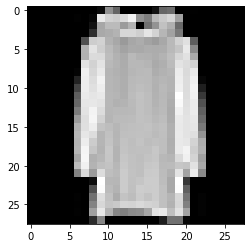

In [ ]:
ind = np.random.randint(0, train_images.shape[0])
plt.imshow(train_images[ind], cmap='gray')
print(f'Label is {train_labels[ind]}')

Label is 2


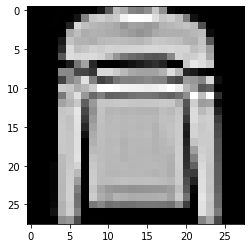

In [ ]:
plt.imshow(train_images[5], cmap='gray')
print(f'Label is {train_labels[5]}')

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

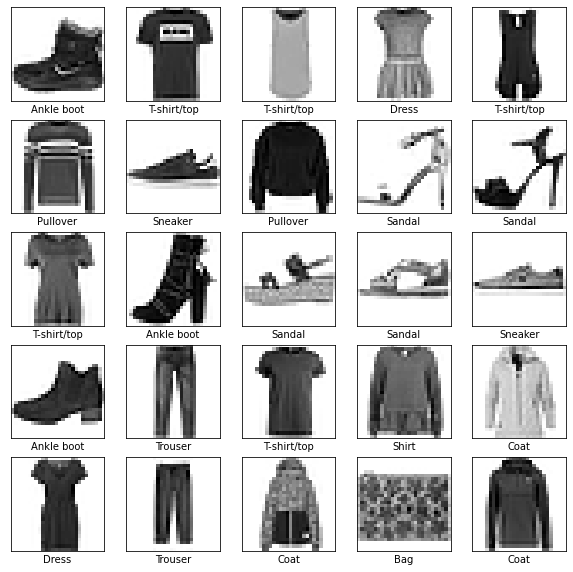

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Label is 0


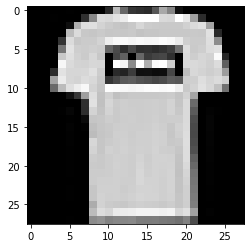

In [ ]:
#посмотрим на объекты с классом 0 (видимо футболки и топы)
plt.imshow(train_images[1], cmap='gray')
print(f'Label is {train_labels[1]}')

Label is 0


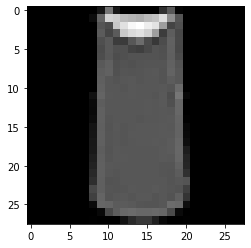

In [ ]:
plt.imshow(train_images[2], cmap='gray')
print(f'Label is {train_labels[2]}')

Label is 0


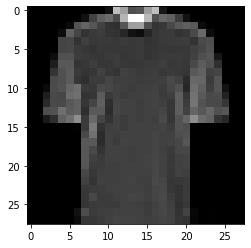

In [ ]:
plt.imshow(train_images[-2], cmap='gray')
print(f'Label is {train_labels[-2]}')

### Нормализация данных и вытягивание признаков



In [ ]:
#нормализация данных

train_images.min(), train_images.max()

(0, 255)

In [ ]:
# Нормировка
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images.min(), train_images.max()

(0.0, 1.0)

In [ ]:
# Вытягивание признаков
X_train = train_images.reshape((-1, 28 * 28))
X_test = test_images.reshape((-1, 28 * 28))

X_train.shape, X_train .shape

((60000, 784), (60000, 784))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[:5], y_test[:5]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

Обучение нейросети

Задание 1

1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

Проверим качество в зависимости от числа нейронов в слое (для 2-х слойной сети).

In [ ]:
%%time
results_num = pd.DataFrame()
n_nums = []
train_losses = []
test_losses = []
train_metrics = []
test_metrics = []


for n_num in list(map(lambda x: 2**x, range(0,10))):
    
    n_nums.append(n_num)
    import tensorflow as tf
    tf.random.set_seed(1)
    
    model = Sequential([
        Dense(64, input_shape=(28 * 28,), activation='relu'),
        Dense(n_num, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_num['n_num'] = n_nums
results_num['train_loss'] = train_losses
results_num['test_loss'] = test_losses
results_num['train_metric'] = train_metrics
results_num['test_metric'] = test_metrics
results_num.sort_values(by='test_metric', ascending=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 dense_2 (Dense)             (None, 10)                20        
                                                                 
Total params: 50,325
Trainable params: 50,325
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 9s 6ms/step - loss: 2.0994 - accuracy: 0.1847 - val_loss: 1.9631 - val_accuracy: 0.2122
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 1.8980 - accuracy: 0.2217 - val_loss: 1.8610 - val_accuracy: 0.2288
Epoch 3/5
938/938 [===============

,n_num,train_loss,test_loss,train_metric,test_metric
7,128,0.437369,0.470678,0.847183,0.8345
6,64,0.439606,0.474134,0.847100,0.8335
5,32,0.441727,0.477250,0.846717,0.8328
8,256,0.443918,0.478793,0.843867,0.8293
9,512,0.447945,0.483081,0.842933,0.8287
4,16,0.456498,0.493037,0.842250,0.8277
3,8,0.504180,0.534430,0.827900,0.8152
2,4,0.573212,0.605351,0.796450,0.7846
1,2,1.174707,1.187957,0.526783,0.5264
0,1,1.599743,1.607179,0.305900,0.3050


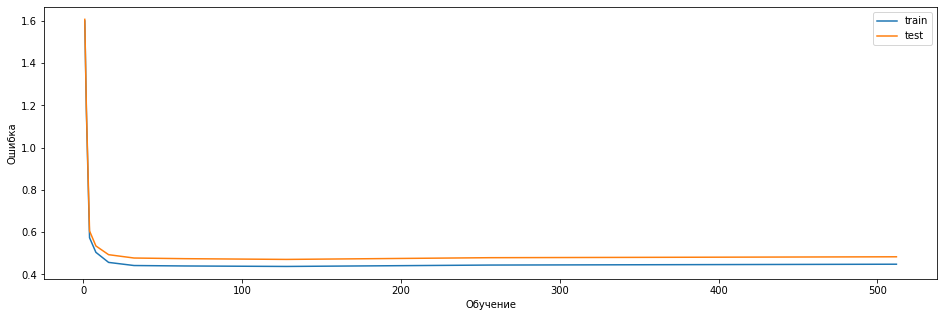

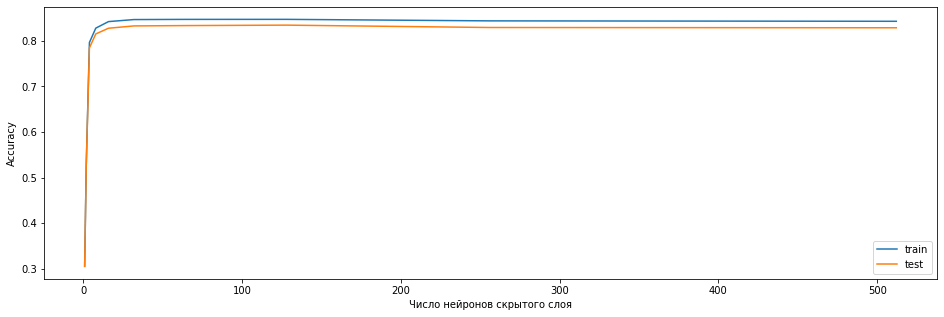

In [ ]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'],results_num['train_loss'], label='train')
plt.plot(results_num['n_num'],results_num['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_num['n_num'],results_num['train_metric'], label='train')
plt.plot(results_num['n_num'],results_num['test_metric'], label='test')
plt.xlabel('Число нейронов скрытого слоя')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Наилучшими оказались результаты:

128	нейронов скрытого слоя. Метрика accuracy на тесте -	0.8343

Тенденция такая - сначала accuracy растет, потом чуть снижается и остается практически неизменной.


Изучим параметры сети в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

In [ ]:
%%time
results_layers = pd.DataFrame()
n_nums = [] # число нейронов скрытых слоев
n_layers = [] # число скрытых слоев
n_pars = [] # число тренируемых параметров
train_losses = [] # ошибка на тренировочной выборке
test_losses = [] # ошибка на тестовой выборке
train_metrics = [] # accuracy на тренировочной выборке
test_metrics = [] # accuracy на тестовой выборке

# Базовый размер возьмем для двухслойной сети с 128 нейронами, и будем равняться на него
k_dict = {2:128, 3:67, 5:45, 10:30}
for n in [2, 3, 5, 10]:
    
    k = k_dict[n]
    net_size = 64 * 785 + 65 * k + (n - 2) * (k + 1) * k + (k + 1) * 10
    n_nums.append(k) 
    n_pars.append(net_size)
    n_layers.append(n)
    
    tf.random.set_seed(1)
    model = Sequential()
    model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
    for i in range(n-1):
        model.add(Dense(k, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.summary()
    
    # Компиляция модели
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=64)
    train_losses.append(train_loss)
    train_metrics.append(train_metric)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=64)
    test_losses.append(test_loss)
    test_metrics.append(test_metric)
    
    
results_layers['n_layer'] = n_layers
results_layers['n_num'] = n_nums
results_layers['n_par'] = n_pars
results_layers['train_loss'] = train_losses
results_layers['test_loss'] = test_losses
results_layers['train_metric'] = train_metrics
results_layers['test_metric'] = test_metrics
results_layers.sort_values(by='test_metric', ascending=False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.9934 - accuracy: 0.6771 - val_loss: 0.6851 - val_accuracy: 0.7590
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5862 - accuracy: 0.8010 - val_loss: 0.5570 - val_accuracy: 0.8106
Epoch 3/5
938/938 [============

,n_layer,n_num,n_par,train_loss,test_loss,train_metric,test_metric
1,3,67,59831,0.430229,0.464135,0.850550,0.8376
0,2,128,59850,0.444381,0.476746,0.844667,0.8317
2,5,45,59835,0.467649,0.510164,0.828650,0.8125
3,10,30,59940,0.532947,0.570371,0.814283,0.7973


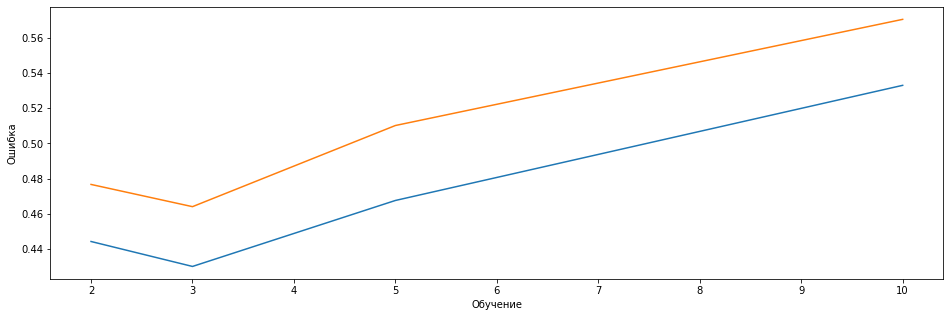

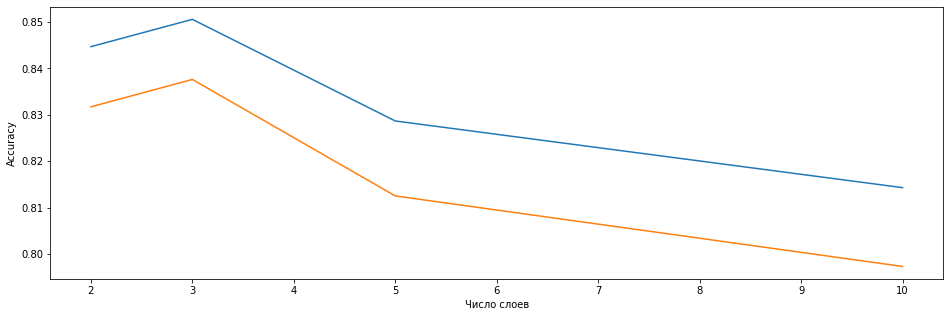

In [ ]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_loss'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_loss'], label='test')
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(results_layers['n_layer'],results_layers['train_metric'], label='train')
plt.plot(results_layers['n_layer'],results_layers['test_metric'], label='test')
plt.xlabel('Число слоев')
plt.ylabel('Accuracy')
plt.show()

Наилучшими параметрами оказались:

3 слоя,	67 нейронов скрытого слоя, метрика на тесте -	0.8376

Задание 2.

2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

Лучшей оказалась модель с 3 слоями и 67 нейронами.
Посмотрим работу разных оптимизаторов (SGD, Adam, RMSProp) для этой модели.

Оптимизатор: SGD
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 1.0092 - accuracy: 0.6764 - val_loss: 0.6860 - val_accuracy: 0.7573
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.5595 - accuracy: 0.8036 - val_loss: 0.5383 - val_accuracy: 0.8137
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4974 - accuracy: 0.8245 - val_loss: 0.5487 - val_accuracy: 0.8021
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.4651 - accuracy: 0.8353 - val_loss: 0.4910 - val_accuracy: 0.8268
Epoch 5/5
157/157 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8350
Качество на тесте: 0.45921415090560913, 0.8349999785423279
Оптимизатор: RMSprop
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.5521 - accuracy: 0.8018 - val_loss: 0.5607 - val_accuracy: 0.8019
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3928 - accuracy: 0.8554 

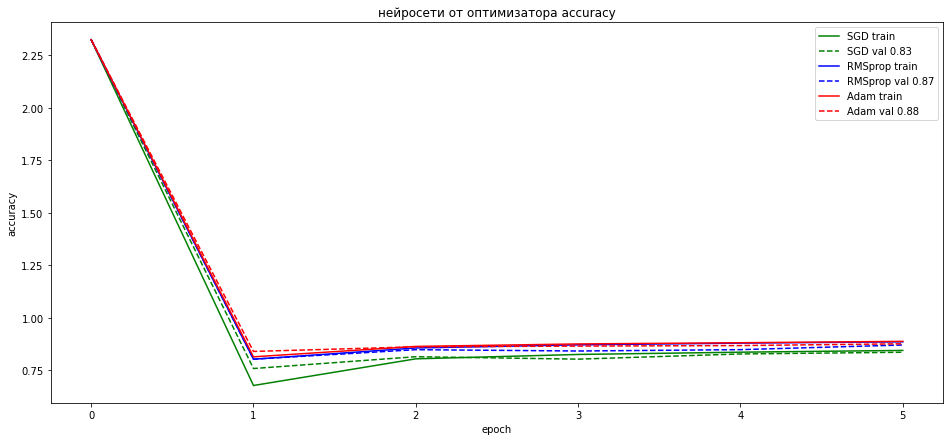

CPU times: user 1min 14s, sys: 8.57 s, total: 1min 23s
Wall time: 1min 16s


In [23]:
%%time

# создаем модель model
tf.random.set_seed(1)
model = Sequential([
    Dense(64, activation='relu', input_shape=(28 * 28,)),
    Dense(67, activation='relu'),
    Dense(67, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r']

num_epochs = 5
batch_size = 64

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                             keras.optimizers.rmsprop_v2.RMSprop(),
                             keras.optimizers.adam_v2.Adam()]):
    print(f'Оптимизатор: {i_optim.get_config()["name"]}')
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
      Dense(64, activation='relu', input_shape=(28 * 28,)),
      Dense(67, activation='relu'),
      Dense(67, activation='relu'),
      Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # вычисляем ошибку для modeli после обучения
    loss, metric = model_i.evaluate(X_test, y_test, batch_size=64)
    print(f'Качество на тесте: {loss}, {metric}')
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    
    # картинки
    '''
    plt.figure(figsize=(16, 7))
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    '''
    
    plt.plot(epoch, ([h0_train[0]] + h.history['accuracy']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, ([h0_val[0]] + h.history['val_accuracy']),
             '--', c=colors[i],
             label=f'{model_i.optimizer.get_config()["name"]} val {metric:.2f}')

plt.legend()
plt.title('нейросети от оптимизатора accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Лучше всего себя показал Adam

Качество на тесте: 0.3500988185405731, 0.8752999901771545

Задание 3.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

Улучшить качество классификации в нейросети на тестовом наборе помогли подбор количетсва слоев и нейронов сети, а также выбор оптимизатора Adam.

In [24]:
model_i = models['Adam']

In [25]:
model_i.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

1/1 [==============================] - 0s 17ms/step


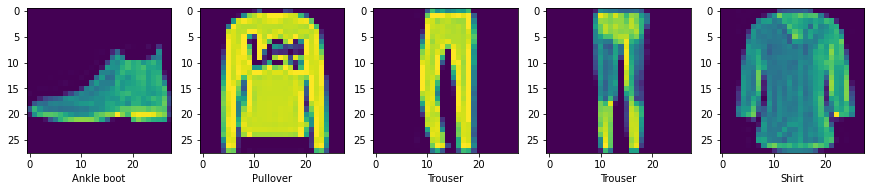

In [29]:
N = 5
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  #plt.xlabel(str(y_pred_class[i]))
  plt.xlabel(str(class_names[test_labels[i]]))
plt.show() 

Задание 4.

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).



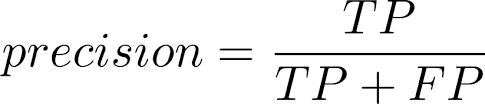

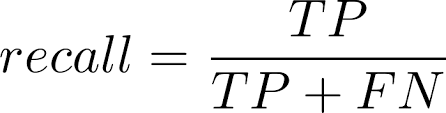

Имея матрицу ошибок, очень просто можно вычислить точность и полноту для каждого класса. Точность (precision) равняется отношению соответствующего диагонального элемента матрицы и суммы всей строки класса. Полнота (recall) — отношению диагонального элемента матрицы и суммы всего столбца класса.

In [31]:
y_pred = model_i.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step


In [35]:
y_pred

array([1.9950492e-04, 2.0340254e-04, 6.5192836e-04, 2.4140819e-03,
       5.3660513e-04, 8.0465168e-01, 5.4485479e-04, 9.0857673e-01,
       1.9940757e-03, 9.9845552e-01], dtype=float32)

In [36]:
CM = confusion_matrix(test_labels, y_pred_class)
print(CM)

[[802   8   9  31   5   1 138   0   6   0]
 [  0 978   1  16   3   0   1   0   1   0]
 [ 13   0 757   8 140   0  81   0   1   0]
 [ 27  16   8 870  42   0  35   0   2   0]
 [  0   1  86  30 819   0  64   0   0   0]
 [  0   0   0   0   0 964   0  18   2  16]
 [107   2  81  29  72   0 702   0   7   0]
 [  0   0   0   0   0  35   0 923   1  41]
 [  1   2   4   3   7   4   6   3 970   0]
 [  0   0   0   0   0   5   1  26   0 968]]


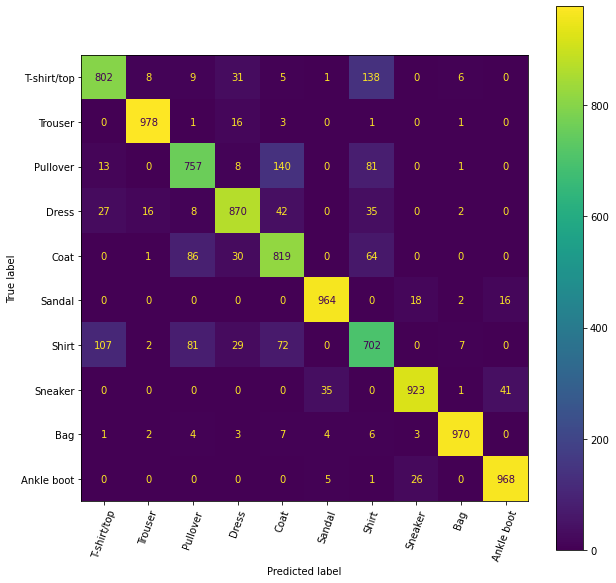

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

In [38]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [42]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, CM)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['class_name'] = class_names
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

In [43]:
pr_rc_result.sort_values(by='precision', ascending=False)

,label,class_name,precision,recall
1,1,Trouser,0.978,0.971202
8,8,Bag,0.970,0.979798
9,9,Ankle boot,0.968,0.944390
5,5,Sandal,0.964,0.955401
7,7,Sneaker,0.923,0.951546
3,3,Dress,0.870,0.881459
4,4,Coat,0.819,0.752757
0,0,T-shirt/top,0.802,0.844211
2,2,Pullover,0.757,0.800211
6,6,Shirt,0.702,0.682879


In [44]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,class_name,precision,recall
8,8,Bag,0.970,0.979798
1,1,Trouser,0.978,0.971202
5,5,Sandal,0.964,0.955401
7,7,Sneaker,0.923,0.951546
9,9,Ankle boot,0.968,0.944390
3,3,Dress,0.870,0.881459
0,0,T-shirt/top,0.802,0.844211
2,2,Pullover,0.757,0.800211
4,4,Coat,0.819,0.752757
6,6,Shirt,0.702,0.682879


In [45]:
ind = []
for i in range(10):
    ind.append(np.where(test_labels == i)[0][0])

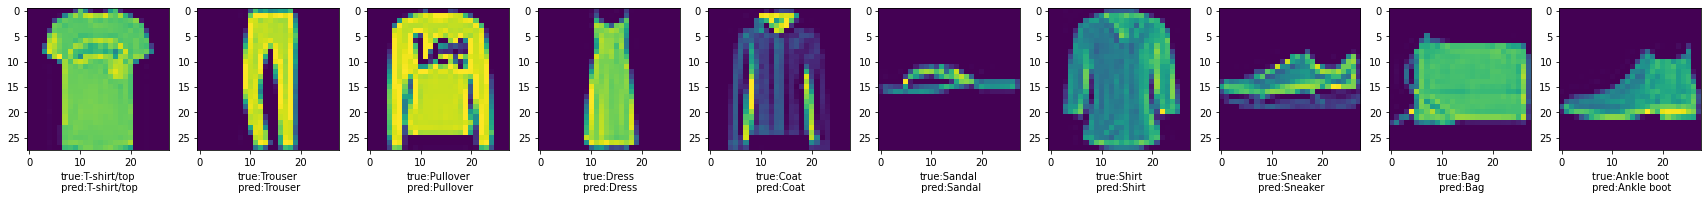

In [46]:
plt.figure(figsize=(3 * 10, 5))
k = 0
for i in ind:
    plt.subplot(1, 10, k+1)
    k+=1
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel('true:' + str(class_names[test_labels[i]]) + '\n pred:' + str(class_names[y_pred_class[i]]))

plt.show() 

Выводы

Модель хорошо различает брюки, сумки и все виды обуви. 
Хуже всего справляется с пальто, рубашками и пулловерами.